# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
from scipy.stats import linregress
from pprint import pprint


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude


### Generate the Cities List by Using the `citipy` Library

In [121]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lats[0], lat_lng[1]).city_name #uses library to find the nearest city based on coordinates
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 302


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [123]:
# Set the API base URL


url = "http://api.openweathermap.org/data/2.5/weather?"
units='metric'
# Define an empty list to fetch the weather data for each city
city_data = [] #doesnt this already exist in cities?
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []
city_name=[]    
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    #print(weather_json)
    # Log the url, record, and set numbers

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
    # Parse the JSON and retrieve data
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_json = requests.get(query_url).json()
    set_count = 1


        


    try:   # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat.append(weather_json['coord']['lat'])
        city_lng.append(weather_json['coord']['lon'])
        city_max_temp.append(weather_json['main']['temp_max'])
        city_humidity.append(weather_json['main']['humidity'])
        city_clouds.append(weather_json['clouds']['all'])
        city_wind.append(weather_json['wind']['speed'])
        city_country.append(weather_json['sys']['country'])
        city_date.append(weather_json['dt'])
        city_name.append(weather_json['name'])
        # Append the City information into city_data list
      

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
city_data={"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}

Beginning Data Retrieval     
-----------------------------
Processing Record 2 of Set 1 | mandan
Processing Record 3 of Set 1 | vilyuchinsk
Processing Record 4 of Set 1 | balykshi
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | shalqar
Processing Record 7 of Set 1 | praia da vitoria
Processing Record 8 of Set 1 | glace bay
Processing Record 9 of Set 1 | st. john's
Processing Record 10 of Set 1 | hoxtolgay
City not found. Skipping...
Processing Record 11 of Set 1 | saint-benoit
Processing Record 12 of Set 1 | zhezqazghan
Processing Record 13 of Set 1 | sydney mines
Processing Record 14 of Set 1 | mandalgovi
Processing Record 15 of Set 1 | luchegorsk
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | rabo de peixe
Processing Record 18 of Set 1 | ocean shores
Processing Record 19 of Set 1 | khovd
Processing Record 20 of Set 1 | presque isle
Processing Record 21 of Set 1 | huanan
Processing Record 22 of Set 1 | gorodoviki
Processi

In [124]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          292
Lat           292
Lng           292
Max Temp      292
Humidity      292
Cloudiness    292
Wind Speed    292
Country       292
Date          292
dtype: int64

In [125]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mandan,46.8267,-100.8896,17.56,60,0,2.57,US,1686540638
1,Vilyuchinsk,52.9306,158.4028,23.15,52,87,1.49,RU,1686540638
2,Balyqshy,47.0667,51.8667,28.00,20,40,8.00,KZ,1686540638
3,Anadyr,64.7500,177.4833,11.28,58,0,4.00,RU,1686540638
4,Shalqar,47.8333,59.6000,28.89,16,100,6.21,KZ,1686540638


In [126]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [127]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Mandan,46.8267,-100.8896,17.56,60,0,2.57,US,1686540638
1,Vilyuchinsk,52.9306,158.4028,23.15,52,87,1.49,RU,1686540638
2,Balyqshy,47.0667,51.8667,28.00,20,40,8.00,KZ,1686540638
3,Anadyr,64.7500,177.4833,11.28,58,0,4.00,RU,1686540638
4,Shalqar,47.8333,59.6000,28.89,16,100,6.21,KZ,1686540638


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

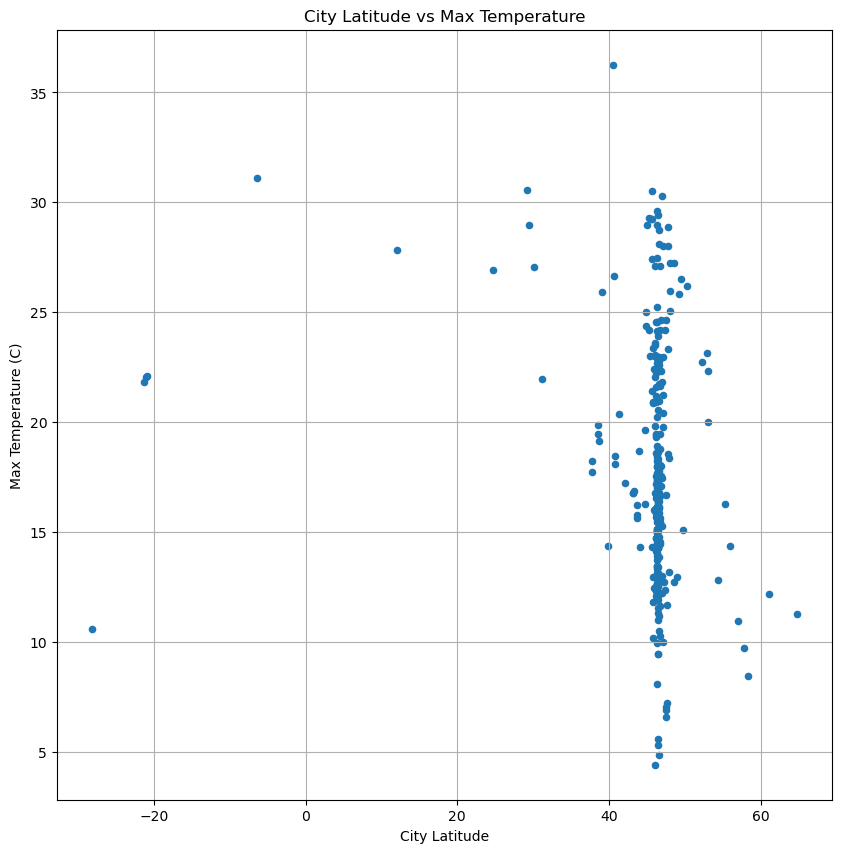

In [134]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(10,10),
              title="City Latitude vs Max Temperature", ylabel="Max Temperature (C)", xlabel="City Latitude" )
#plt.show()



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

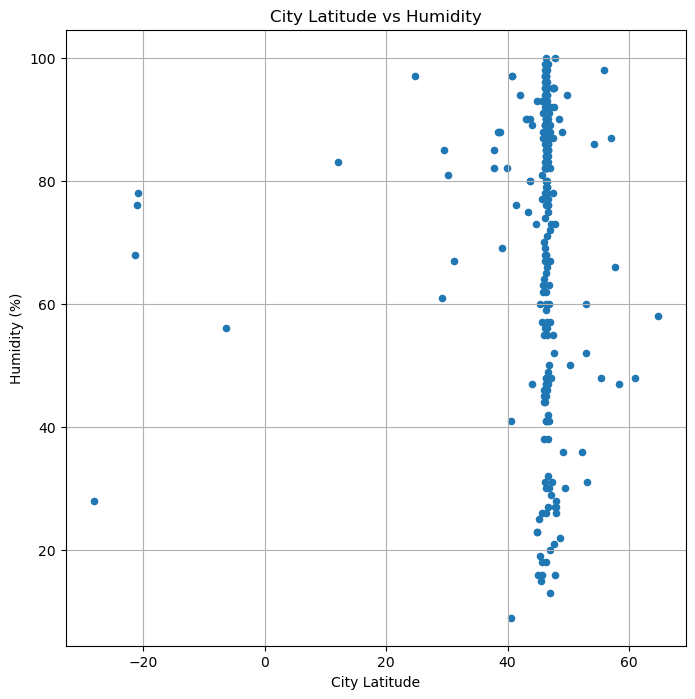

In [129]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(10,10),
              title="City Latitude vs Humidity",ylabel="Humidity (%)", xlabel="City Latitude" )

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

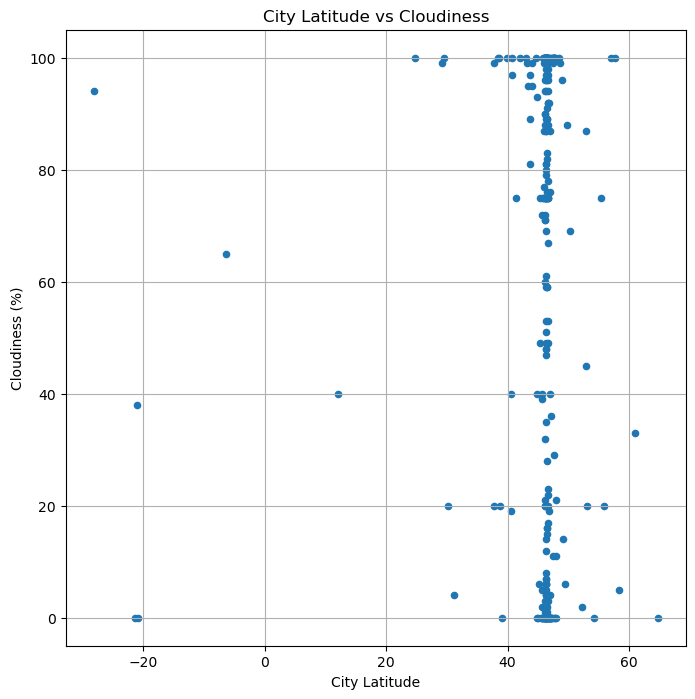

In [130]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(10,10),
              title="City Latitude vs Cloudiness",ylabel="Cloudiness (%)", xlabel="City Latitude" )

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

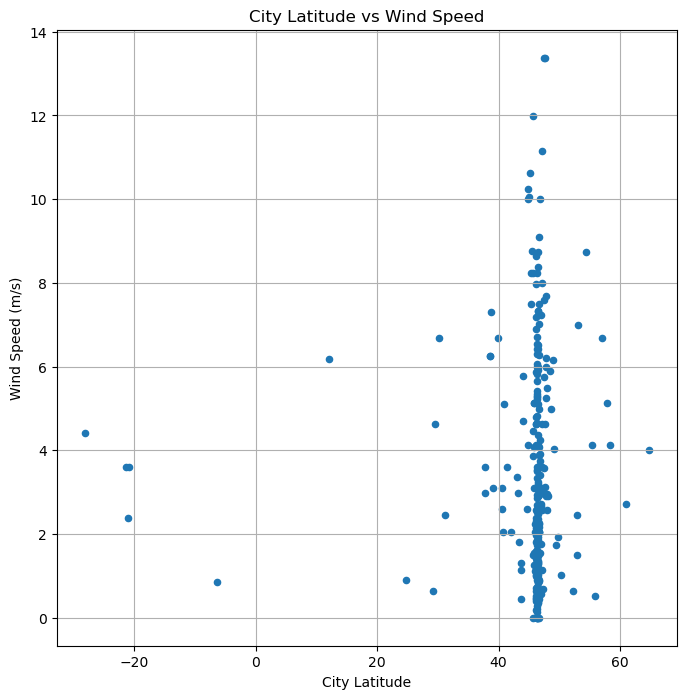

In [131]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(10,10),
              title="City Latitude vs Wind Speed",ylabel="Wind Speed (m/s)", xlabel="City Latitude" )

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [175]:
# Define a function to create Linear Regression plots
def show_linear_regression(df, x_column, y_column):
    # Extract the x and y values from the dataframe
    x = df[x_column]
    y = df[y_column]
    
    # Create and fit the linear regression model
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot the data points and the linear regression line
    #generate plots
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, regress_values, color='red', label='Linear Regression')

    #print values
    plt.annotate(line_eq,(20,10),fontsize=15,color="red")
    
    # Add labels and title to the plot
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{x_column} vs {y_column}')
    
    # Display the legend and plot
    plt.legend()
    plt.show()
    print(f"The r-squared is: {rvalue**2}")
    # Show the plot
    


In [144]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Mandan,46.8267,-100.8896,17.56,60,0,2.57,US,1686540638
1,Vilyuchinsk,52.9306,158.4028,23.15,52,87,1.49,RU,1686540638
2,Balyqshy,47.0667,51.8667,28.00,20,40,8.00,KZ,1686540638
3,Anadyr,64.7500,177.4833,11.28,58,0,4.00,RU,1686540638
4,Shalqar,47.8333,59.6000,28.89,16,100,6.21,KZ,1686540638


In [145]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,Saint-Benoît,-21.0380,55.7194,22.06,76,38,2.38,RE,1686540639
74,Saint-Pierre,-21.3393,55.4781,21.82,68,0,3.60,RE,1686540652
117,Karaton,-6.3424,106.1045,31.09,56,65,0.86,ID,1686540661
262,Sainte-Marie,-20.8968,55.5496,22.09,78,0,3.60,RE,1686540691
281,Warrenton,-28.1140,24.8475,10.58,28,94,4.42,ZA,1686540695


###  Temperature vs. Latitude Linear Regression Plot

y = -0.38x + 35.4


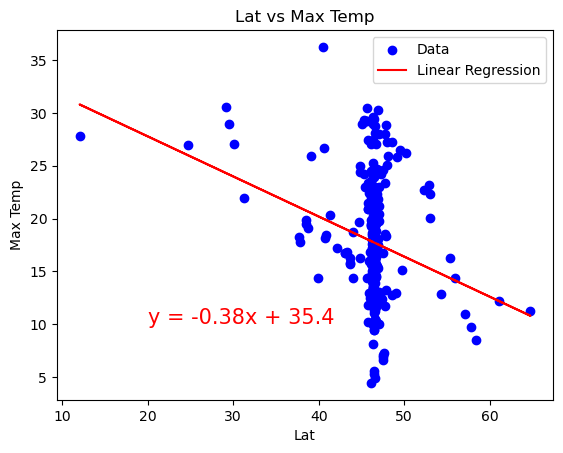

The r-squared is: 0.08019235262952362


In [176]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
show_linear_regression(northern_hemi_df,'Lat', 'Max Temp')



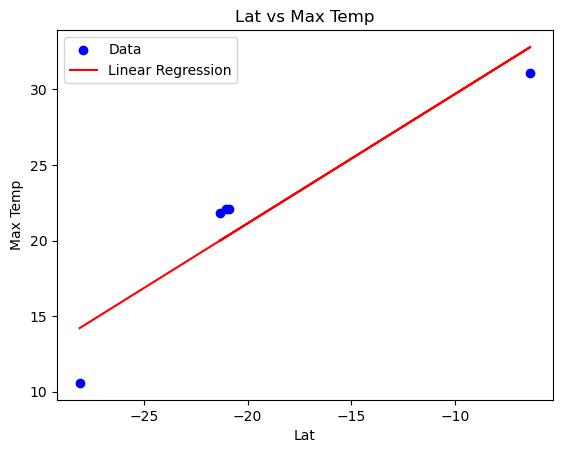

In [152]:
# Linear regression on Southern Hemisphere
show_linear_regression(southern_hemi_df,'Lat', 'Max Temp')

**Discussion about the linear relationship:** 
We can see two issues here, one is that the northen hemishpere has more cities and that its clearly summer ion the northen hemisphere. However, there is little correlation between latitude and max temp. As you can see, at a very similar latitude we have nearly the whole range of temperatures recorded.

### Humidity vs. Latitude Linear Regression Plot

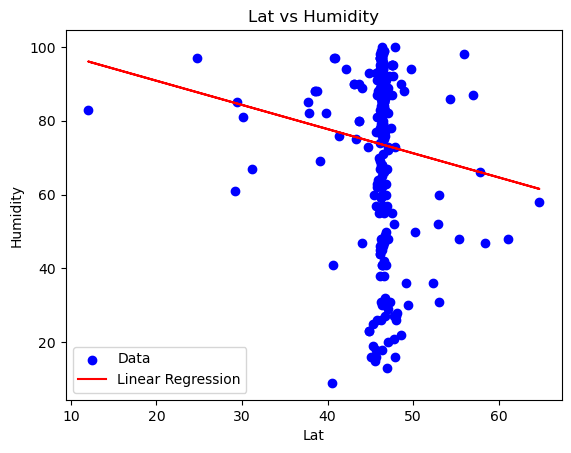

In [154]:
# Northern Hemisphere
show_linear_regression(northern_hemi_df,'Lat', 'Humidity')
# northern_hemi_df

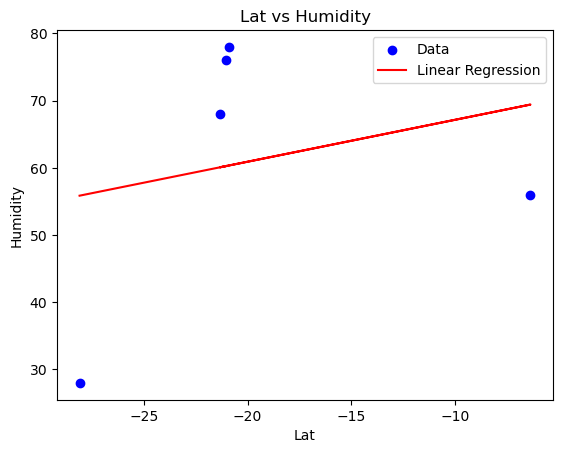

In [155]:
# Southern Hemisphere
show_linear_regression(southern_hemi_df,'Lat', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

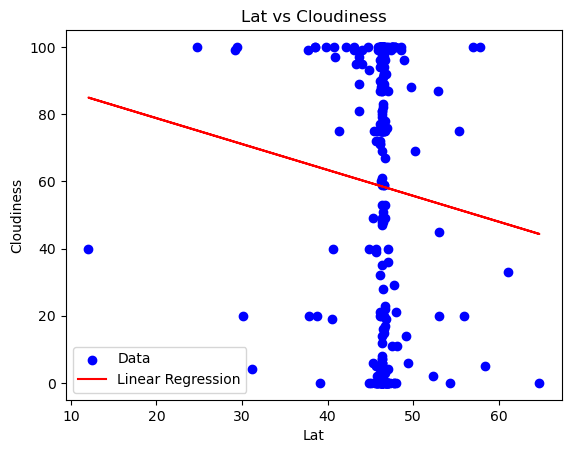

The r-squared is: 0.005764971302369286


In [160]:
# Northern Hemisphere
show_linear_regression(northern_hemi_df,'Lat', 'Cloudiness')


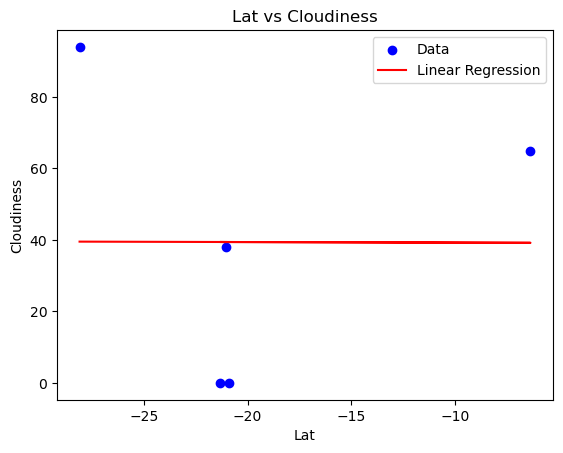

The r-squared is: 8.549583633766323e-06


In [159]:
# Southern Hemisphere
show_linear_regression(southern_hemi_df,'Lat', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

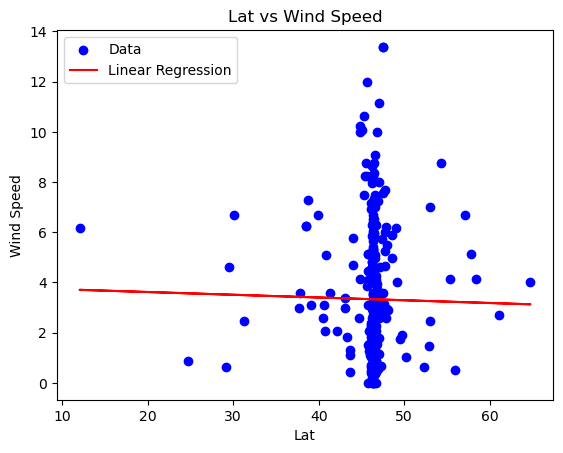

The r-squared is: 0.00029109427099059107


In [161]:
# Northern Hemisphere
show_linear_regression(northern_hemi_df,'Lat', 'Wind Speed')

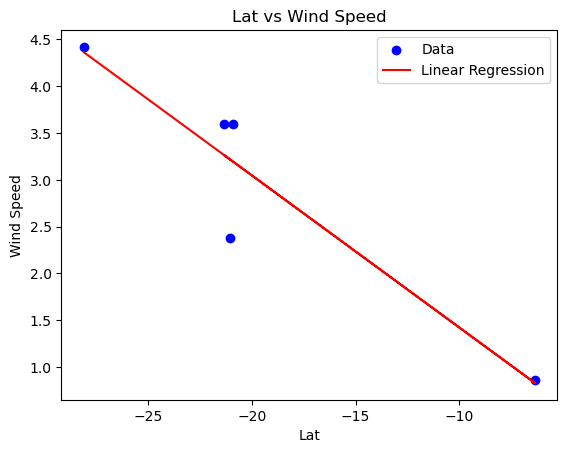

The r-squared is: 0.8725800387859205


In [162]:
# Southern Hemisphere
show_linear_regression(southern_hemi_df,'Lat', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE